<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Introducción al Aprendizaje Automático  2021-2 </h1>

<H3 align='center'> Ayudantía 1 </H3>

----

<H3 align='center'> <b>Profesor: Ricardo Ñanculef </b> </H3>
<H3 align='center'> <b>Ayudantes: Álvaro Fuentes, Mario Mallea </b> </H3>



<hr style="height:2px;border:none"/>


Temas: Intro. a Jupyter y Visualización con Matplotlib/Seaborn.

## Jupyter Notebooks & Google Colaboratory


####  Jupyter 
<p><img alt="Colaboratory logo" height="45px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/1200px-Jupyter_logo.svg.png" align="left" hspace="10px" vspace="0px">  </p>  

**Project Jupyter** es un proyecto open-source que busca apoyar la ciencia de datos y computación científica en todos los lenguajes de programación.

**Jupyter Notebook** es una aplicación web open-source que permite crear y compartir documentos que contienen código, ecuaciones, visualizaciones y texto.

Vamos a trabajar sobre archivos .ipynb llamados **notebooks** (ahora mismo estas leyendo un notebook) ejecutando código en **Python 3.X**. 
 
Existen diversas formas para trabajar sobre un notebook en tu computador, entre ellas se encuenta:
- Instalar JupyterLab vía conda o pip (package installer for Python) (más info: https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html)
- Instalar una distribución de Anaconda. Esta incluye Python, Jupyter Notebook y otros paquetes de uso común para la computación científica (sitio oficial: https://www.anaconda.com/)
-En Google Colaboratory (descrito en la siguiente sección).

Tutorial introductorio a Jupyter Notebook: 
https://realpython.com/jupyter-notebook-introduction/






<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

#### ¿Qué es Colaboratory? 



Colaboratory, también llamado "Colab", te permite ejecutar y programar en Python (dentro de un notebook) en tu navegador con las siguientes ventajas:
- No requiere configuración
- Permite compartir contenido fácilmente
- Da acceso gratuito a GPUs
- Cargar datos desde Google Drive
- Facilita la importación: de modelos clásicos, datos de problemas clásicos, librerías habituales en Data Science/Computer Science.

Puedes importar un conjunto de datos, entrenar un modelo de Machine Learning con dicho conjunto de datos y evaluar el modelo con pocas líneas de código. 

Los **notebooks de Colab** ejecutan código en los servidores en la nube de Google, lo que te permite aprovechar la potencia del hardware de Google, incluidas las GPU y TPU.

*Desventaja:* 
- Tiempos de cómputo y recursos a merced de Google.
- RAM limitada.
- Desconexión.


### Conexión a Google Drive

In [1]:
# hacer la conexión a Google Drive

colab_flag = True
if (colab_flag):
    from google.colab import drive
    drive.mount('/content/drive')

path = '/content/drive/MyDrive/Machine_Learning/Test/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
if (colab_flag):
    !echo $path
    !unzip $path/Test.zip

/content/drive/MyDrive/Machine_Learning/Test/
Archive:  /content/drive/MyDrive/Machine_Learning/Test//Test.zip
replace Test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Test.txt                


In [3]:
if (colab_flag):
    file = open('Test.txt', 'r')
    print(list(file)[0])

Hola mundo!


## Ecosistema Básico 

Independiente de que plataforma ustedes decidan utilizar para crear y ejecutar notebooks, se les recomienda el uso de Python como lenguaje de programación. En las demostraciones prácticas de este curso utilizaremos además todo el ecosistema de este lenguaje para data science y machine learning. 



In [4]:
# NumPy es una librería fundamental para la computación científica en Python.
import numpy as np

# Matplotlib es una librería para la creación de visualizaciones estáticas, animadas e interactivas en Python.
import matplotlib.pyplot as plt

# Libreria de visualización de datos basada en matplotlib.
import seaborn as sns

# Pandas es una librería que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar en Python. 
# Facilitará el manejo de los datos.
import pandas as pd

## Iris Dataset


*The famous Iris database.*

![Iris](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
print( iris['DESCR'] )

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
numeric_features = iris['feature_names']
print(numeric_features)

clases = iris['target_names']
print(clases)

print(iris['data'].shape)
print(iris['target'].shape)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [7]:
example = 0

print( iris['data'][example, :] )
print( iris['target'][example] )
print( clases[ iris['target'][example] ] )

[5.1 3.5 1.4 0.2]
0
setosa


### Inline for 

In [8]:
# obtener target por nombres con un for clásico
target_with_names = []

for target in iris['target']:
    target_with_names.append( iris['target_names'][target] )

print(target_with_names)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

In [9]:
# ejemplo de inline for

dummy =  [ x for x in range(10)]
print(dummy)

dummy =  [ x for x in range(10) if x > 4 and x < 9]
print(dummy)

dummy =  [ x for x in range(10) if x > 4]
print(dummy)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [10]:
# inline for para 

target_with_names = [iris['target_names'][target]  for target in iris['target'] ]

print(target_with_names)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

In [11]:
target_with_names = np.array(target_with_names)

unique, counts = np.unique(target_with_names, return_counts = True)
dict(zip(unique, counts))

{'setosa': 50, 'versicolor': 50, 'virginica': 50}

### Pandas

https://pandas.pydata.org/

Usualmente trabajaremos con DataFrame de Pandas 

In [12]:
print(numeric_features)

for i, feature in enumerate(numeric_features):
    print(feature, iris['data'][:, i].shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
sepal length (cm) (150,)
sepal width (cm) (150,)
petal length (cm) (150,)
petal width (cm) (150,)


In [13]:
iris_dataframe = pd.DataFrame()


for i, feature in enumerate(numeric_features):
    print(feature, iris['data'][:, i].shape)
    iris_dataframe[feature] = iris['data'][:, i]

iris_dataframe.head()

sepal length (cm) (150,)
sepal width (cm) (150,)
petal length (cm) (150,)
petal width (cm) (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
iris_dataframe['species'] = target_with_names

print(iris_dataframe.shape)
iris_dataframe.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# podemos acceder facilmente a datos en DataFrames

iris_dataframe["sepal width (cm)"] > 3.0

0       True
1      False
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148     True
149    False
Name: sepal width (cm), Length: 150, dtype: bool

In [16]:
iris_dataframe[iris_dataframe["sepal width (cm)"] > 3.0]

#iris_dataframe[(iris_dataframe["sepal width (cm)"] > 3.0) & (iris_dataframe["sepal width (cm)"] < 3.2)] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


In [17]:
# guardar en .csv

iris_dataframe.to_csv("iris.csv", index=False)

In [18]:
# cargar .csv

iris_dataframe_2 = pd.read_csv("iris.csv")
iris_dataframe_2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
# cargar .csv desde Google Drive
if (colab_flag):
    iris_dataframe_3 = pd.read_csv( path + "iris.csv")
    print(iris_dataframe_3.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]


### Seaborn

In [20]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


      species  counts
0      setosa      50
1  versicolor      50
2   virginica      50


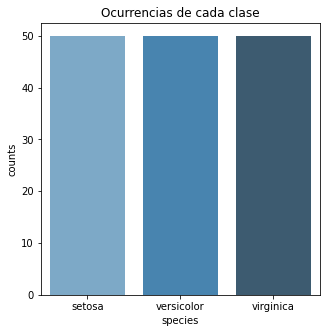

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

kd = iris.groupby(['species']).size().reset_index(name='counts')
print(kd)

sns.barplot(data=kd, y='counts', x='species', palette="Blues_d", ax=ax)
ax.set_title('Ocurrencias de cada clase')
plt.show()

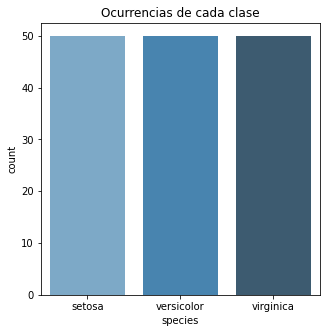

In [22]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_title('Ocurrencias de cada clase')
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# Blues_d, Oranges, etc.

#sns.countplot(y="species", data=iris, palette="Blues_d", ax = ax)
sns.countplot(x="species", data=iris, palette="Blues_d", ax = ax)
plt.show()

Al trabajar con dataset reales, muchas veces no estarán los datos completos: puede que existan celdas sin valores (NaN) o datos que deben ser "limpiados" antes de aplicar un modelo. Por ejemplo, podremos tener valores perdidos, valores erróneos, valores no usables, etc. 

En particular en Iris esto no sucede:

In [23]:
# revisar cuantos datos faltan por columna
print("Número de datos NaN por feature: \n")
print(iris.isnull().sum(axis = 0))

Número de datos NaN por feature: 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


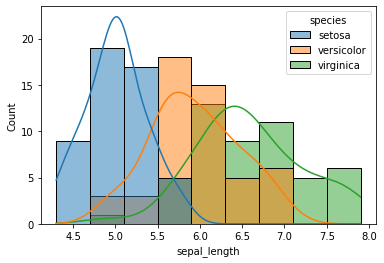

In [24]:
sns.histplot(data=iris, x="sepal_length", hue="species", kde = True)

(2, 2)


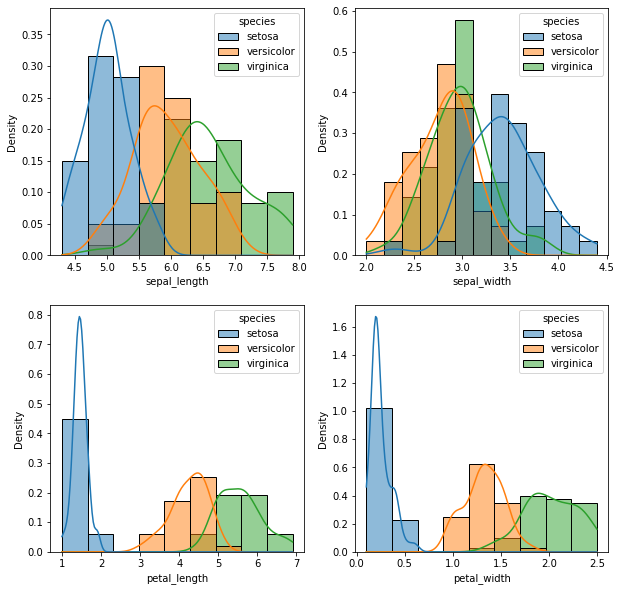

In [25]:
features = ["sepal_length", "sepal_width", "petal_length","petal_width"]

# forma 1

fig, ax = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
print(ax.shape)

for i, column in enumerate(features):
    sns.histplot(data=iris, x=column, hue="species", kde = True, stat = "density", ax=ax[i//2, i%2])

plt.show()


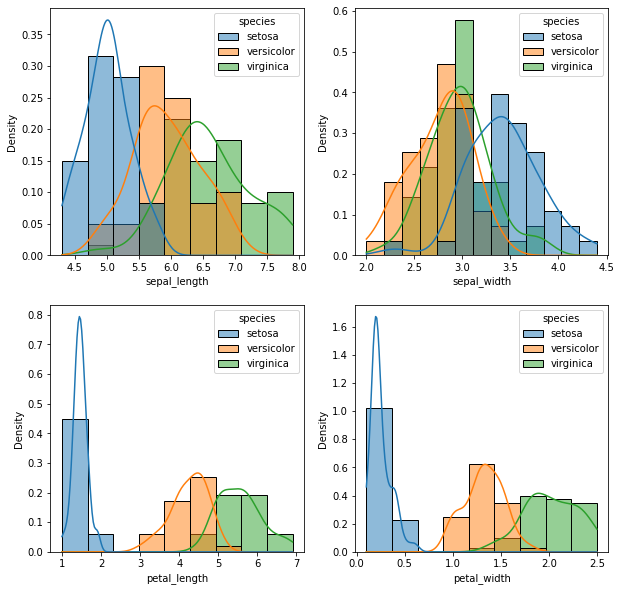

In [26]:
# forma 2

fig = plt.figure(figsize=(10, 10))
#fig.subplots_adjust( wspace=0.1, hspace=0.3)

idx = 1
for i, column in enumerate(features):
    
    ax = fig.add_subplot(2, 2, idx)
    idx+=1
    
    sns.histplot(data=iris, x=column, hue="species", kde = True, stat = "density")


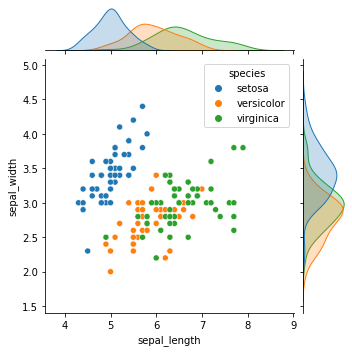

In [27]:

sns.jointplot(data=iris, x="sepal_length", y="sepal_width", hue="species", height = 5)


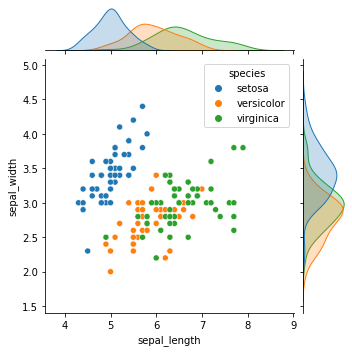

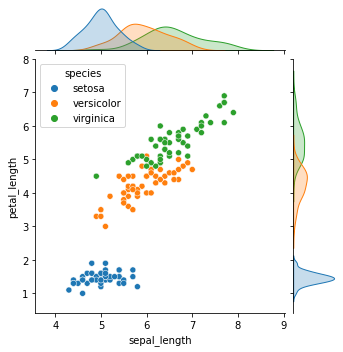

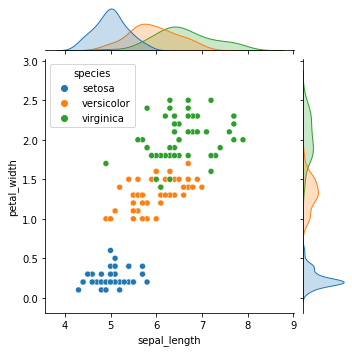

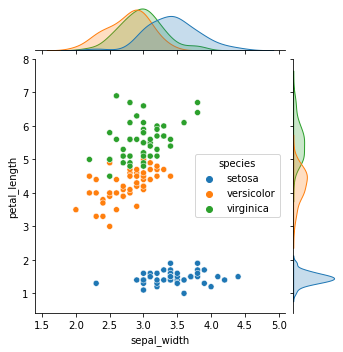

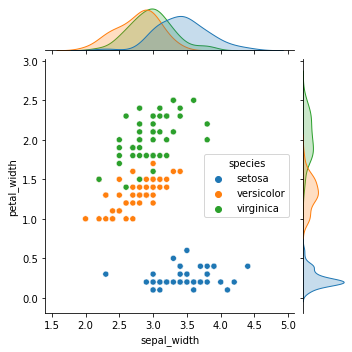

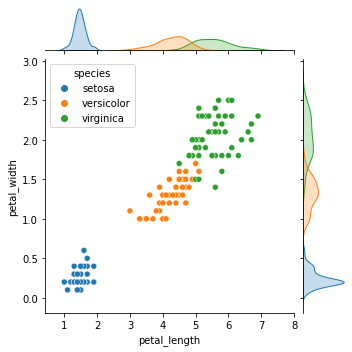

In [28]:
features = ["sepal_length", "sepal_width", "petal_length","petal_width"]

for i, column_i in enumerate(features):
    for j, column_j in enumerate(features[i:]):
        if (column_i == column_j):
             continue
        sns.jointplot(data=iris, x=column_i, y = column_j, hue="species", height = 5)

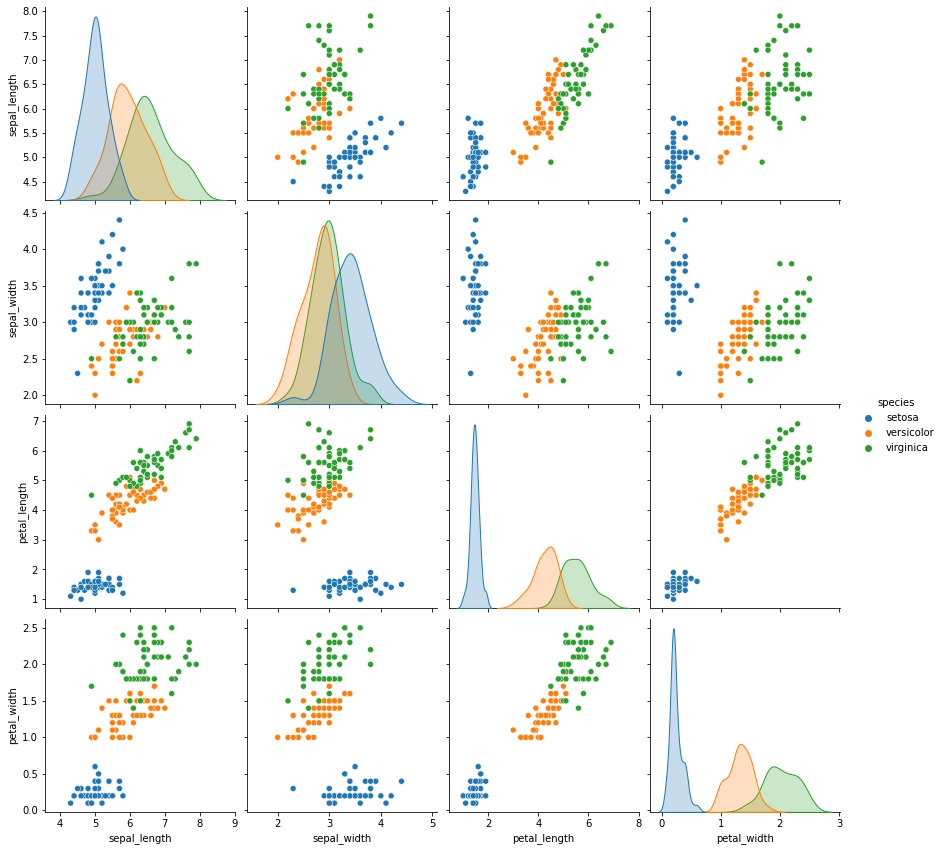

In [29]:
sns.pairplot(iris,hue="species", height=3, )

[]

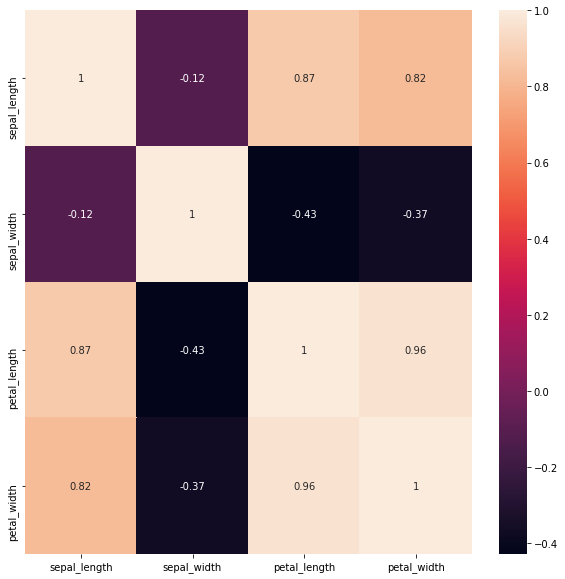

In [30]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(iris.corr(),annot=True, cmap="rocket")
plt.plot()